In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

2024-02-24 20:20:49.267230: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 20:20:49.425993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 20:20:49.426092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 20:20:49.428880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 20:20:49.448943: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 20:20:59.505613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x=pd.DataFrame(y_train)
x[0].value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

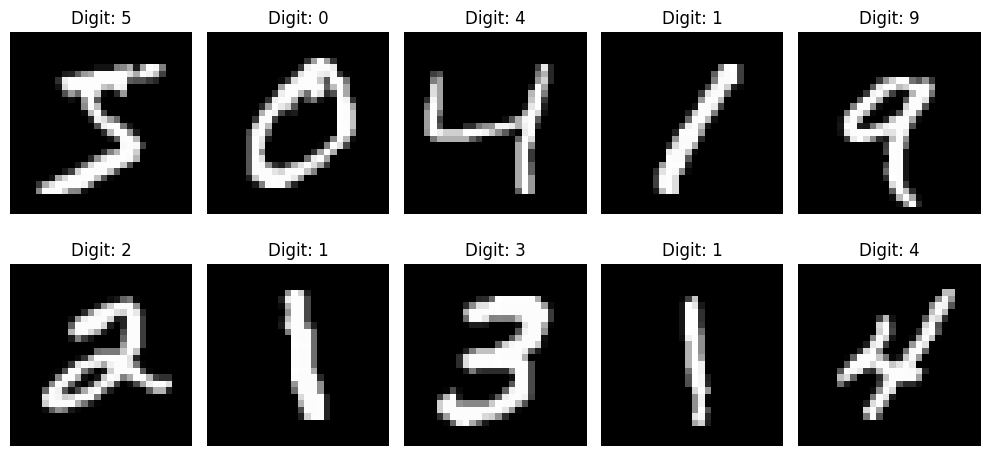

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):  # Display the first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [8]:
x=pd.DataFrame(y_train)
x[0].value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

THE PIXELS OF A IMAGE 

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train[0].dtype

dtype('uint8')

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

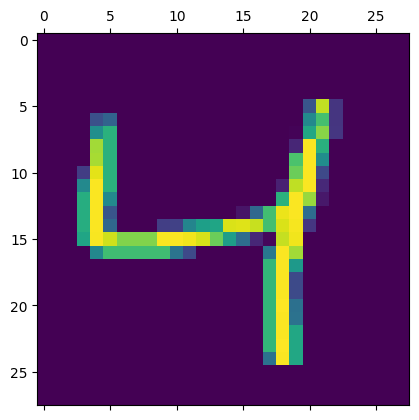

In [12]:
plt.matshow(x_train[2])

In [13]:
y_train[2]

4

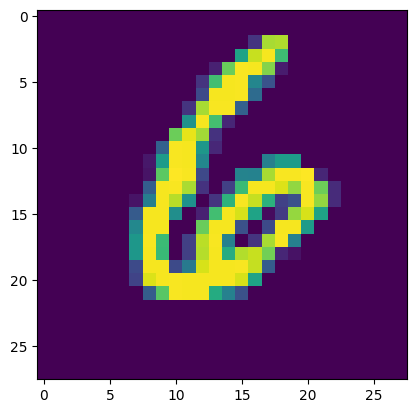

In [14]:
plt.imshow(x_train[13])

In [15]:
y_train[13]

6

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train= x_train/255
x_test = x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

FLATTENING

In [19]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)


x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [20]:
x_train_flattened.shape

(60000, 784)

In [21]:
x_test_flattened.shape

(10000, 784)

TRAINING OUR MODEL

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

2024-02-24 20:21:31.362652: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4665 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3034 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2826 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2661 - accuracy: 0.9257


PREDICTING AND EVALUATING OUR MODEL BY TESTING

In [23]:
model.evaluate(x_test_flattened, y_test)

2024-02-24 20:22:23.627643: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.2688 - accuracy: 0.9237


[0.26877662539482117, 0.9236999750137329]

In [24]:
model.predict(x_test_flattened)

2024-02-24 20:22:25.742100: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step


array([[3.4802195e-02, 4.0537904e-07, 6.8912119e-02, ..., 9.9982363e-01,
        8.7808430e-02, 7.3398066e-01],
       [4.0101194e-01, 4.7112983e-03, 9.9956787e-01, ..., 1.0016393e-12,
        1.1620620e-01, 3.7926982e-09],
       [3.9536520e-04, 9.9582535e-01, 6.7305243e-01, ..., 1.6198502e-01,
        3.8820753e-01, 5.6798253e-02],
       ...,
       [2.9951352e-06, 5.7251900e-06, 8.1696542e-04, ..., 2.7552554e-01,
        4.9876437e-01, 8.3766586e-01],
       [1.3979849e-04, 1.9246942e-04, 1.1540506e-04, ..., 5.1054616e-05,
        5.6406862e-01, 1.8094268e-04],
       [1.0304774e-02, 5.5474986e-10, 2.0295976e-01, ..., 2.5488298e-08,
        1.9982133e-04, 1.5642433e-06]], dtype=float32)

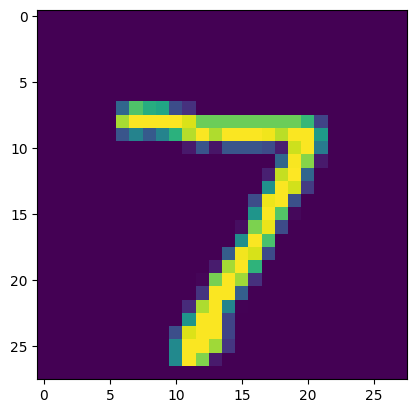

In [25]:
plt.imshow(x_test[0])

In [26]:
y_predict=model.predict(x_test_flattened)
y_predict[0]


  1/313 [..............................] - ETA: 15s

2024-02-24 20:22:28.687632: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step


array([3.4802195e-02, 4.0537904e-07, 6.8912119e-02, 9.5506930e-01,
       4.3933773e-03, 1.0222154e-01, 1.6596555e-06, 9.9982363e-01,
       8.7808430e-02, 7.3398066e-01], dtype=float32)

In [27]:
np.argmax(y_predict[0])

7

In [28]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
y_predicted_labels= [np.argmax(i) for i in y_predict]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [30]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  923,   17,   11,    2,   13,   11,   36,    4],
       [   4,    1,   20,  926,    2,   14,    2,   10,   17,   14],
       [   2,    1,    2,    1,  924,    0,   11,    4,    6,   31],
       [   9,    3,    4,   40,   13,  756,   20,    8,   31,    8],
       [  13,    3,    7,    1,    8,    7,  916,    2,    1,    0],
       [   1,    6,   23,    4,    7,    0,    0,  947,    1,   39],
       [   8,   11,    8,   24,   10,   23,   10,   11,  851,   18],
       [  11,    7,    1,    7,   35,    6,    0,   22,    6,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

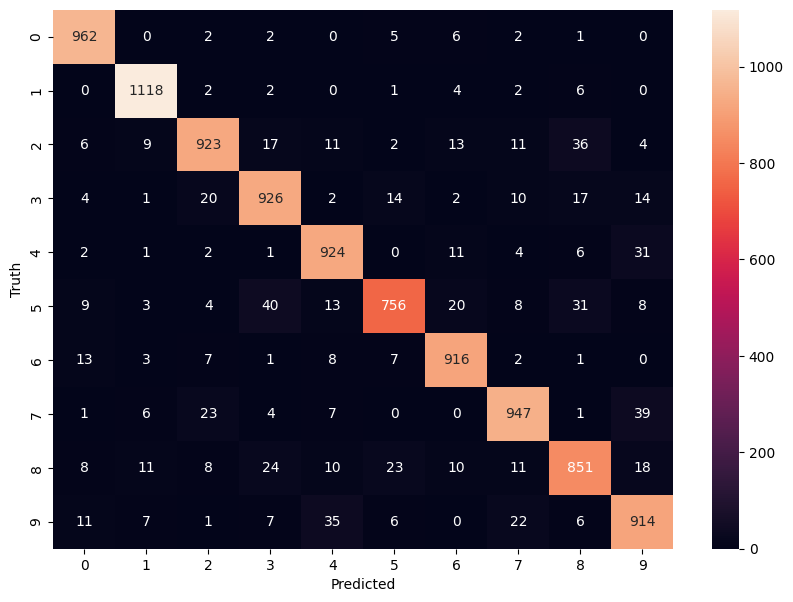

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ADDING HIDDEN LAYER

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

2024-02-24 20:22:36.030886: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2721 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1213 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0860 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0656 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0514 - accuracy: 0.9842


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9731


[0.0864829421043396, 0.9731000065803528]

In [34]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predict]

313/313 [==============================] - 1s 4ms/step


In [35]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [36]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    0,    0,    1,    3,    1],
       [   0, 1114,    4,    0,    0,    0,    2,    0,   15,    0],
       [  10,    3,  984,    3,    2,    0,    1,    8,   21,    0],
       [   2,    0,    2,  979,    0,    9,    0,    5,   10,    3],
       [   1,    0,    3,    0,  943,    2,    4,    2,    4,   23],
       [   3,    0,    0,    7,    1,  871,    1,    1,    7,    1],
       [   9,    3,    0,    1,    2,    8,  927,    0,    8,    0],
       [   1,    3,   10,    3,    1,    0,    0,  995,    4,   11],
       [   5,    0,    2,    1,    1,    1,    0,    3,  958,    3],
       [   4,    3,    0,    3,    2,    3,    1,    3,    5,  985]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

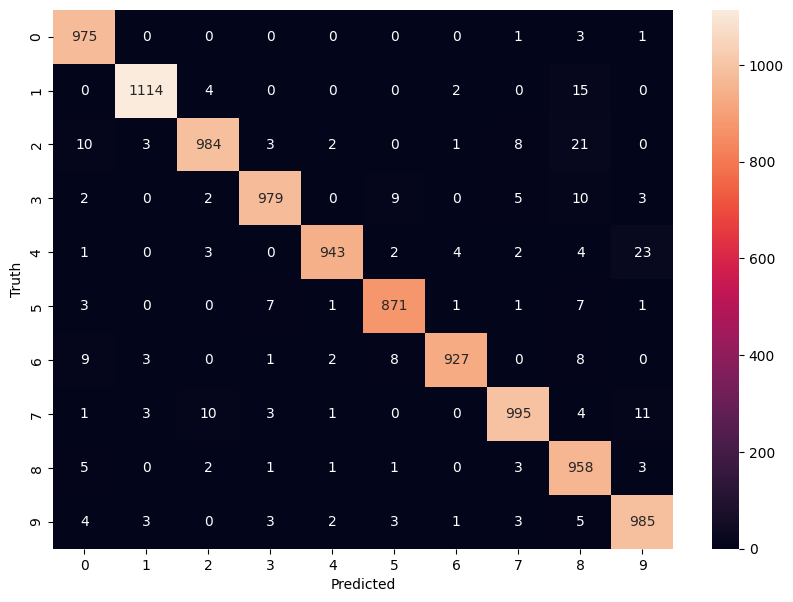

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

MAKING FLATTENED LAYER DIRECTLY IN THE MODEL SO WE DON'T HAVE TO RESHAPE

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2756 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1268 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0888 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0677 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0541 - accuracy: 0.9829


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2417 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1041 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0753 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0582 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0470 - accuracy: 0.9852


In [41]:
y_predict = model.predict(x_test)
y_predicted_labels= [np.argmax(i) for i in y_predict]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 [==============================] - 2s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

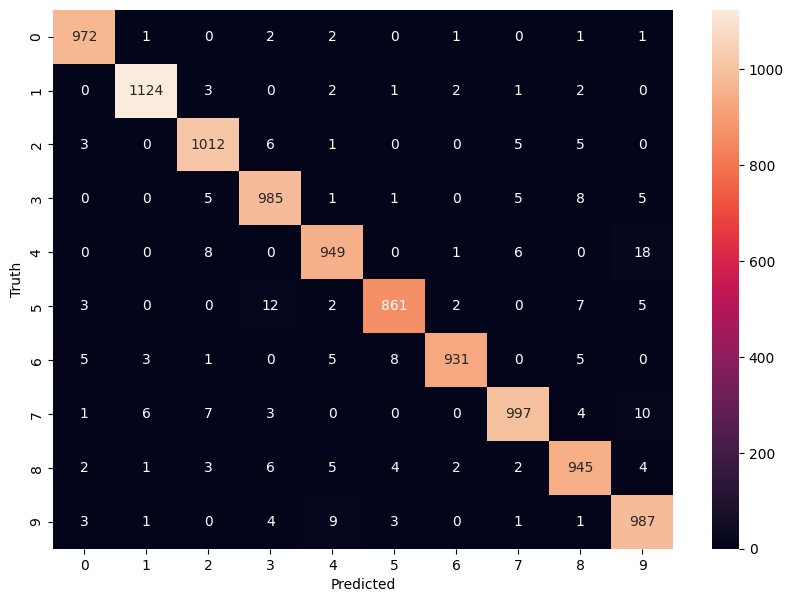

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model.save("digit_recoginition.h5")

/home/mohammed_abdulla/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
